In [1]:
import os 
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,12)})
from pybaseball import plot_stadium

In [2]:
player_pos = pd.read_csv("D:\\new_downloads\SMT-Data-Challenge\SMT-Data-Challenge\\player_pos.csv", nrows=100000)
player_pos

,game_str,play_id,timestamp,player_position,field_x,field_y
0,1900_01_TeamKJ_TeamB,1,20549,1,-1.1805,56.9901
1,1900_01_TeamKJ_TeamB,1,20582,1,-1.1394,56.8299
2,1900_01_TeamKJ_TeamB,1,20615,1,-1.0986,56.6691
3,1900_01_TeamKJ_TeamB,1,20648,1,-1.0572,56.5080
4,1900_01_TeamKJ_TeamB,1,20681,1,-1.0155,56.3460
...,...,...,...,...,...,...
99995,1900_01_TeamKJ_TeamB,137,4595289,4,38.9286,144.6933
99996,1900_01_TeamKJ_TeamB,137,4595322,4,39.0204,144.5946
99997,1900_01_TeamKJ_TeamB,137,4594761,5,-70.9683,92.8668
99998,1900_01_TeamKJ_TeamB,137,4594794,5,-70.8966,92.8188


In [3]:
fielder_pos = player_pos[
    (player_pos['player_position'] <= 9) & 
    (player_pos['player_position'] >= 1)]
mapping = {1:'pitcher',
           2:'catcher',
           3:'first baseman',
           4:'second baseman',
           5:'third baseman',
           6:'shortstop',
           7:'left field',
           8:'center field',
           9:'right field'}
fielder_pos['player_position'] = fielder_pos['player_position'].map(mapping)
fielder_pos

C:\Users\Oliver Chang\AppData\Local\Temp\ipykernel_14812\2631372421.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fielder_pos['player_position'] = fielder_pos['player_position'].map(mapping)


,game_str,play_id,timestamp,player_position,field_x,field_y
0,1900_01_TeamKJ_TeamB,1,20549,pitcher,-1.1805,56.9901
1,1900_01_TeamKJ_TeamB,1,20582,pitcher,-1.1394,56.8299
2,1900_01_TeamKJ_TeamB,1,20615,pitcher,-1.0986,56.6691
3,1900_01_TeamKJ_TeamB,1,20648,pitcher,-1.0572,56.5080
4,1900_01_TeamKJ_TeamB,1,20681,pitcher,-1.0155,56.3460
...,...,...,...,...,...,...
99995,1900_01_TeamKJ_TeamB,137,4595289,second baseman,38.9286,144.6933
99996,1900_01_TeamKJ_TeamB,137,4595322,second baseman,39.0204,144.5946
99997,1900_01_TeamKJ_TeamB,137,4594761,third baseman,-70.9683,92.8668
99998,1900_01_TeamKJ_TeamB,137,4594794,third baseman,-70.8966,92.8188


In [4]:
def label_point(x, y, val, ax):
    a = pd.concat({'x':x, 'y':y, 'val':val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+1, point['y']+1, str(point['val']), size=10)

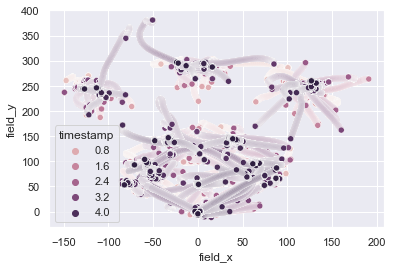

In [5]:
ax = sns.scatterplot(x='field_x', y='field_y', hue='timestamp', data=player_pos)
# plot_stadium(team='generic', title="plot", axis=ax.axes)
# label_point(play_1.field_x, play_1.field_y, play_1.player_position, plt.gca())

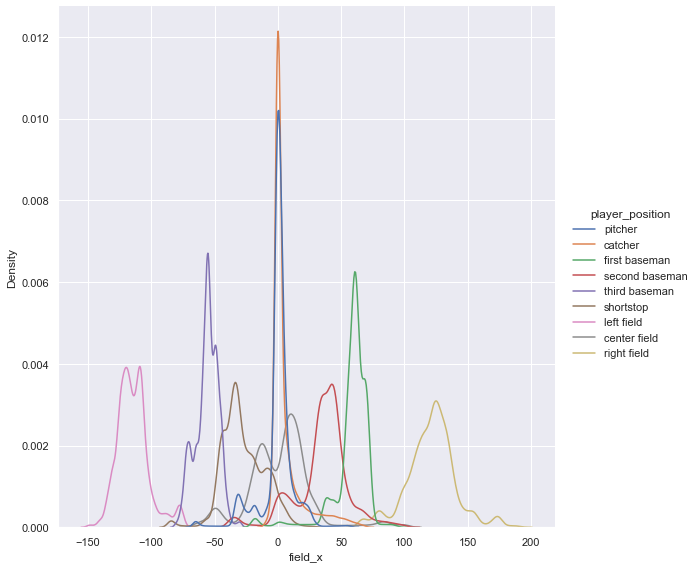

In [6]:
ax = sns.displot(fielder_pos, x="field_x", hue="player_position", kind="kde", height=8)

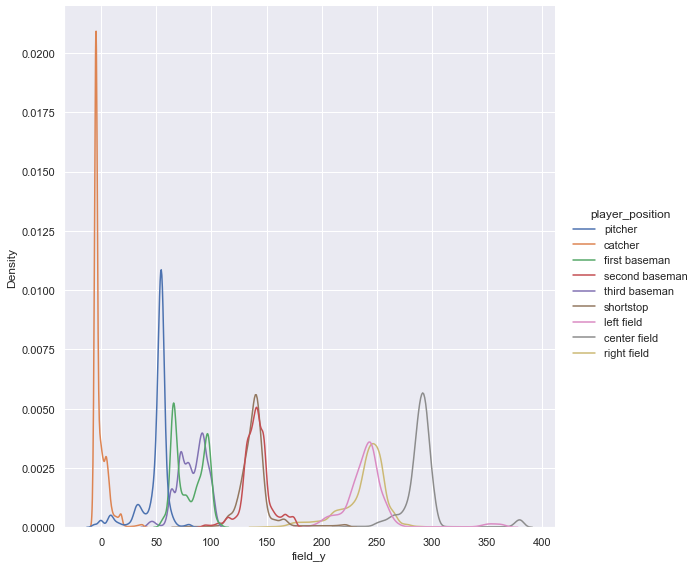

In [7]:
ax = sns.displot(fielder_pos, x="field_y", hue="player_position", kind="kde", height=8)

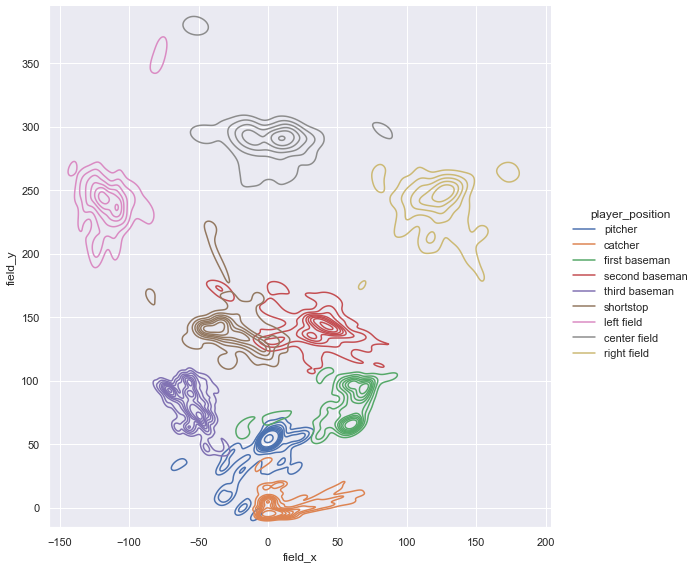

In [8]:
ax = sns.displot(fielder_pos, x="field_x", y="field_y", hue="player_position", kind="kde", height=8)